In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x_train = np.array([
    [2, 75, 80, 1, 5, 2, 1, 1, 70000],  # Sample student data
    [3, 80, 90, 1, 3, 3, 0, 2, 80000],
    [4, 85, 95, 0, 2, 4, 1, 1, 75000],
    [1, 65, 70, 1, 4, 1, 0, 0, 50000],
    [5, 90, 100, 1, 6, 5, 1, 3, 100000],
    [2.5, 78, 85, 0, 5, 2, 1, 1, 60000],
    [3.5, 82, 92, 1, 4, 3, 0, 2, 70000],
    [4.5, 88, 96, 1, 1, 4, 1, 1, 90000],
    [1.5, 70, 75, 1, 2, 2, 0, 0, 55000],
    [3.0, 80, 88, 1, 3, 3, 1, 2, 72000]
])

# Target values: Exam Scores
y_train = np.array([65, 70, 80, 55, 90, 68, 75, 85, 58, 72])

print(f"x_train shape: {x_train.shape} \ny_train shape: {y_train.shape} ")

x_train shape: (10, 9) 
y_train shape: (10,) 


In [8]:
b_init = 0
w_init = np.zeros(x_train.shape[1])
print(f"w_init shape: {w_init.shape} \b_init type: {type(b_init)} ")

w_init shape: (9,) _init type: <class 'int'> 


In [9]:
def predict(x, w, b):
    return np.dot(x, w)+b

In [11]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = predict(x[i], w, b)
        cost += (f_wb-y[i])**2
    return cost/(2*m)

In [22]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw, dj_db = np.zeros((n,)), 0
    
    for i in range(m):
        err = predict(x[i], w, b)-y[i]
        for j in range(n):
            dj_dw+=err*x[i, j]
        dj_db+=err
    dj_dw/=m
    dj_db/=m
    return dj_dw, dj_db

In [53]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = copy.deepcopy(w_in)
    b = 0
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w-alpha*dj_dw
        b = b-alpha*dj_db
    
        if i < 100000:
                J_history.append(cost)

            # Print the cost at intervals
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:8.2f}")
    
    return w, b, J_history

In [54]:
x_test = np.array([
    [2.0, 76, 78, 1, 4, 3, 1, 1, 65000],  # Student 1
    [3.5, 85, 90, 0, 5, 4, 0, 2, 72000],  # Student 2
    [4.0, 90, 95, 1, 3, 3, 1, 1, 80000],  # Student 3
    [1.0, 60, 65, 1, 2, 2, 0, 0, 40000]   # Student 4
])
y_test = np.array([70, 78, 85, 50])

initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 1.0e-10

w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {predict(x_train[i], w_final, b_final)}, target value: {y_train[i]}")

Iteration    0: Cost  2633.60
Iteration  100: Cost  2633.60
Iteration  200: Cost  2633.60
Iteration  300: Cost  2633.60
Iteration  400: Cost  2633.60
Iteration  500: Cost  2633.60
Iteration  600: Cost  2633.60
Iteration  700: Cost  2633.60
Iteration  800: Cost  2633.60
Iteration  900: Cost  2633.60
b,w found by gradient descent: 0.00,[0.00097958 0.00097958 0.00097958 0.00097958 0.00097958 0.00097958
 0.00097958 0.00097958 0.00097958] 
prediction: 68.73384043978106, target value: 65
prediction: 78.54428425201381, target value: 70
prediction: 73.65620490872459, target value: 80
prediction: 49.11785069040906, target value: 55
prediction: 98.16419230146057, target value: 90
prediction: 58.945437065468965, target value: 68
prediction: 68.75392172766433, target value: 75
prediction: 88.35423827673718, target value: 85
prediction: 54.025031746562824, target value: 58
prediction: 70.70670452743325, target value: 72


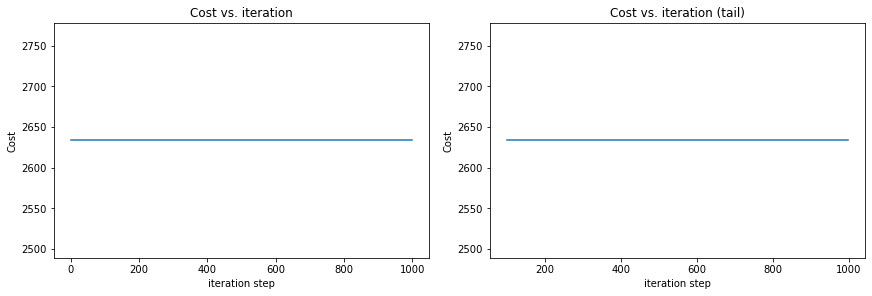

In [59]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

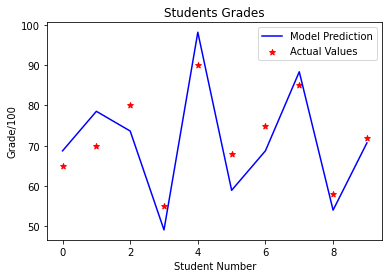

In [60]:
tmp_f_wb = [predict(x_train[i], w_final, b_final) for i in range(len(x_train))]


plt.plot(range(len(x_train)), tmp_f_wb, c='b', label='Model Prediction') 
plt.scatter(range(len(x_train)), y_train, marker='*', c='r', label='Actual Values')

plt.title("Students Grades")
plt.ylabel('Grade/100')
plt.xlabel('Student Number')  
plt.legend()

plt.show()

# Using Scikit-Learn

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd

In [96]:
df = pd.DataFrame(x_train2, columns=['GPA', 'Exam Score 1', 'Exam Score 2', 'Gender', 'Number of Extracurricular Activities', 'Study Hours per Day', 'is in a Club', 'Has a Scholarship', 'Annual Family Income'])
df['Grade'] = y_train2
df

,GPA,Exam Score 1,Exam Score 2,Gender,Number of Extracurricular Activities,Study Hours per Day,is in a Club,Has a Scholarship,Annual Family Income,Grade
0,2.0,75.0,80.0,1.0,5.0,2.0,1.0,1.0,70000.0,65
1,3.0,80.0,90.0,1.0,3.0,3.0,0.0,2.0,80000.0,70
2,4.0,85.0,95.0,0.0,2.0,4.0,1.0,1.0,75000.0,80
3,1.0,65.0,70.0,1.0,4.0,1.0,0.0,0.0,50000.0,55
4,5.0,90.0,100.0,1.0,6.0,5.0,1.0,3.0,100000.0,90
5,2.5,78.0,85.0,0.0,5.0,2.0,1.0,1.0,60000.0,68
6,3.5,82.0,92.0,1.0,4.0,3.0,0.0,2.0,70000.0,75
7,4.5,88.0,96.0,1.0,1.0,4.0,1.0,1.0,90000.0,85
8,1.5,70.0,75.0,1.0,2.0,2.0,0.0,0.0,55000.0,58
9,3.0,80.0,88.0,1.0,3.0,3.0,1.0,2.0,72000.0,72


In [101]:
x_train2, x_test,y_train2, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Using LinearRegression()

In [102]:
linear_model = LinearRegression()
linear_model.fit(x_train2, y_train2)

LinearRegression()

In [120]:
y_train_predict = linear_model.predict(x_train2)
y_test_predict = linear_model.predict(x_test)

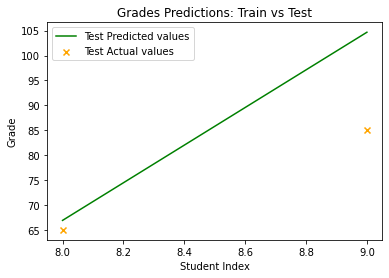

In [131]:
test_indices = range(len(x_train2), len(x_train2) + len(x_test))  # Adjust index for test data
plt.scatter(test_indices, y_test, color="orange", label="Test Actual values", marker='x')
plt.plot(test_indices, y_test_predict, c='g', label='Test Predicted values')
plt.title('Grades Predictions: Train vs Test')
plt.xlabel('Student Index')
plt.ylabel('Grade')
plt.legend()
plt.show()

# Using Ridge()

In [111]:
from sklearn.linear_model import Ridge

In [129]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train2, y_train2)
y_predict2 = ridge_model.predict(x_test)

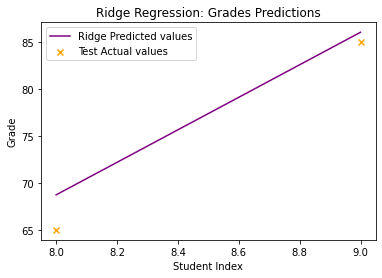

In [130]:

# Plotting actual vs predicted values for Ridge regression
plt.scatter(test_indices, y_test, color="orange", label="Test Actual values", marker='x')
plt.plot(test_indices, y_predict2, c='purple', label='Ridge Predicted values')

# Final plot settings
plt.title('Ridge Regression: Grades Predictions')
plt.xlabel('Student Index')
plt.ylabel('Grade')
plt.legend()
plt.show()